# Forecasting beer sales 

In [794]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split

In [795]:
RELATIVE_DATA_FOLDER_PATH = './data'
RELATIVE_TRAIN_DATA_PATH = 'train.csv'
RELATIVE_TEST_DATA_PATH = 'test.csv'
RELATIVE_DATA_PATH = 'data.csv'

def get_data(relative_data_folder_path, relative_path):
    abs_path = os.path.abspath(os.path.join(relative_data_folder_path, relative_path))
    return pd.read_csv(abs_path, header = 0, decimal=",")

# # load data from csv
# df_train = get_data(RELATIVE_DATA_FOLDER_PATH, RELATIVE_TRAIN_DATA_PATH)
# df_test = get_data(RELATIVE_DATA_FOLDER_PATH, RELATIVE_TEST_DATA_PATH)

data = get_data(RELATIVE_DATA_FOLDER_PATH, RELATIVE_DATA_PATH)
data.head()

,SkuShort,Country,Year,Week,NumberWorkdays,AvgTemp,AvgRain,AvgSun,IsLockdown,PdtHl,BgtHl,PrevWeekSalesHl1,PrevWeekSalesHl2,SalesHl
0,2605,CZ,2016,1,5,-1.164286,0.935714,1.014286,0,NaN,7604.628708,NaN,NaN,7141.0
1,2605,CZ,2016,2,5,0.871429,1.014286,1.292857,0,NaN,7604.628708,7141.0,NaN,7336.0
2,2605,CZ,2016,3,5,-3.921429,0.842857,2.621429,0,NaN,7604.628708,7336.0,7141.0,8071.0
3,2605,CZ,2016,4,5,5.914286,0.821429,2.271429,0,NaN,7604.628708,8071.0,7336.0,11801.0
4,2605,CZ,2016,5,5,5.714286,0.414286,1.628571,0,NaN,7023.243269,11801.0,8071.0,6896.0


In [796]:
# show data types and NaNs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SkuShort          265 non-null    int64  
 1   Country           265 non-null    object 
 2   Year              265 non-null    int64  
 3   Week              265 non-null    int64  
 4   NumberWorkdays    265 non-null    int64  
 5   AvgTemp           261 non-null    float64
 6   AvgRain           261 non-null    float64
 7   AvgSun            261 non-null    float64
 8   IsLockdown        265 non-null    int64  
 9   PdtHl             11 non-null     float64
 10  BgtHl             261 non-null    float64
 11  PrevWeekSalesHl1  264 non-null    float64
 12  PrevWeekSalesHl2  263 non-null    float64
 13  SalesHl           265 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory usage: 29.1+ KB


In [797]:
cols_drop = ['SkuShort', 'Country', 'Year', 'SalesHl']

y = pd.DataFrame(data.SalesHl).round(0).astype(int)
x = data.drop(cols_drop,axis=1).fillna(-1)

x.PrevWeekSalesHl1 = x.PrevWeekSalesHl1.round(0).astype(int)
x.PrevWeekSalesHl2 = x.PrevWeekSalesHl2.round(0).astype(int)
x.BgtHl = x.BgtHl.round(0).astype(int)
x.PdtHl = x.PdtHl.round(0).astype(int)

#y.head()
x.head()
#x.shape
#y.shape

,Week,NumberWorkdays,AvgTemp,AvgRain,AvgSun,IsLockdown,PdtHl,BgtHl,PrevWeekSalesHl1,PrevWeekSalesHl2
0,1,5,-1.164286,0.935714,1.014286,0,-1,7605,-1,-1
1,2,5,0.871429,1.014286,1.292857,0,-1,7605,7141,-1
2,3,5,-3.921429,0.842857,2.621429,0,-1,7605,7336,7141
3,4,5,5.914286,0.821429,2.271429,0,-1,7605,8071,7336
4,5,5,5.714286,0.414286,1.628571,0,-1,7023,11801,8071


In [798]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

x_train.head()

,Week,NumberWorkdays,AvgTemp,AvgRain,AvgSun,IsLockdown,PdtHl,BgtHl,PrevWeekSalesHl1,PrevWeekSalesHl2
190,35,5,22.978571,1.764286,8.778571,0,-1,5786,6788,7142
138,35,5,18.014286,2.228571,5.221429,0,-1,7505,8902,9156
218,11,5,6.571429,2.364286,5.285714,0,-1,4275,4522,4924
17,18,5,13.428571,1.335714,7.721429,0,-1,13031,10404,9406
75,24,5,18.292857,1.507143,8.257143,0,-1,8612,10024,10789


In [799]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_percentage_error


from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import HuberRegressor, Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared, ConstantKernel as C
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create linear regression object
#model = linear_model.LinearRegression(fit_intercept= True, normalize = True, positive = True) # 0.8098

#model = linear_model.RidgeCV() # 0.8254

#model = neighbors.KNeighborsRegressor(n_neighbors = 5, weights='distance') #['uniform', 'distance'] # 0.7919

#model = linear_model.Ridge(alpha=.1) #0.8252

#model = linear_model.RANSACRegressor() #0.7971

#model = Ridge(alpha=0.0, random_state=0, normalize=True) #0.8251

#model = HuberRegressor(alpha=0.0001, epsilon=1.35, max_iter=100, fit_intercept=True) #00.8408

# model = BayesianRidge(tol=1e-6, fit_intercept=True, compute_score=True) #0.7913
# model.set_params(alpha_init=0.025, lambda_init=1)

#model = BayesianRidge() #0.7913

# k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
# k2 = 2.0**2 * RBF(length_scale=100.0) \
#     * ExpSineSquared(length_scale=1.0, periodicity=1.0,
#                      periodicity_bounds="fixed")  # seasonal component
# # medium term irregularities
# k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
# k4 = 0.1**2 * RBF(length_scale=0.1) \
#     + WhiteKernel(noise_level=0.1**2,
#                   noise_level_bounds=(1e-5, np.inf))  # noise terms
# kernel = k1 + k2 + k3 + k4
# model = GaussianProcessRegressor(kernel=kernel, alpha=0,normalize_y=True)# 0.8163


rng = np.random.RandomState(1)
model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, splitter='random'),n_estimators=100, random_state=rng, loss = 'exponential')#0.8712

#model = DecisionTreeRegressor(max_depth=4)#0.8433

# Train the model using the training sets
model.fit(x_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(x_test)

# The mean squared error
print('Mean squared error: %.4f'% mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'% r2_score(y_test, y_pred))

#Best possible score is 1.0, lower values are worse.
print('Explained variance regression: %.4f'% explained_variance_score(y_test, y_pred))

#max_error metric calculates the maximum residual error.
print('Maximum residual error: %.4f'% max_error(y_test, y_pred))

#Mean absolute percentage error regression loss.
print('Mean absolute percentage error regression loss: %.4f'% mean_absolute_percentage_error(y_test, y_pred))


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Mean squared error: 921632.4914
Coefficient of determination: 0.8738
Explained variance regression: 0.8774
Maximum residual error: 3108.2500
Mean absolute percentage error regression loss: 1.1495


In [800]:
import joblib

model_path = './models/default.joblib'

dir_path = os.path.dirname(model_path)
if (not os.path.isdir(dir_path)):
    os.mkdir(dir_path)

joblib.dump(model, model_path, compress=True)

['./models/default.joblib']

In [801]:
import eli5
from eli5.sklearn import PermutationImportance

feature_names = x_train.columns.tolist()

# get permutation importance on training data
permutation_importance = PermutationImportance(model, random_state=1).fit(x_train, y_train)

# show permutation importance
eli5.show_weights(
    permutation_importance,
    feature_names = feature_names
)


Weight,Feature
0.2411 ± 0.0479,PrevWeekSalesHl1
0.2057 ± 0.0221,IsLockdown
0.1125 ± 0.0280,PrevWeekSalesHl2
0.0780 ± 0.0125,BgtHl
0.0419 ± 0.0162,AvgTemp
0.0318 ± 0.0123,NumberWorkdays
0.0269 ± 0.0026,Week
0.0169 ± 0.0047,AvgRain
0.0139 ± 0.0032,AvgSun
0.0000 ± 0.0000,PdtHl


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

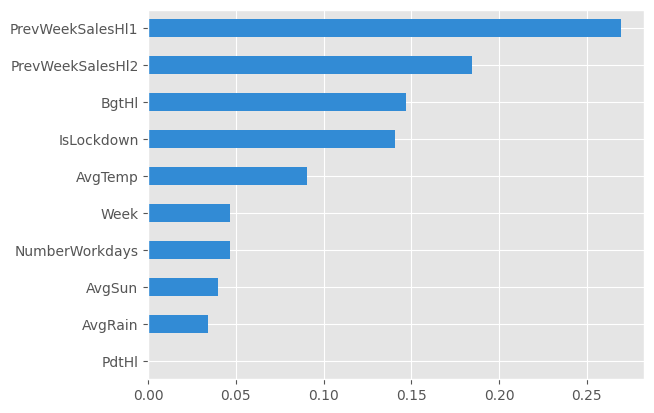

In [802]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

feature_names = x_train.columns.tolist()
x_train_numpy = x_train.to_numpy()

interpreter = Interpretation(x_train_numpy, feature_names = feature_names)

# wrap our base model with InMemoryModel instance
intepretable_model = InMemoryModel(
    model.predict, 
    examples = x_train_numpy, 
    feature_names = feature_names,
    model_type = 'regressor'
)

interpreter.feature_importance.plot_feature_importance(intepretable_model, progressbar = False)

In [803]:
import shap
shap.initjs()
TOP_ITEMS_CNT = 50

shap_explainer = shap.KernelExplainer(model.predict, x_test.values)

shap_values = shap_explainer.shap_values(x_test.iloc[:TOP_ITEMS_CNT])

100%|██████████| 50/50 [01:10<00:00,  1.41s/it]


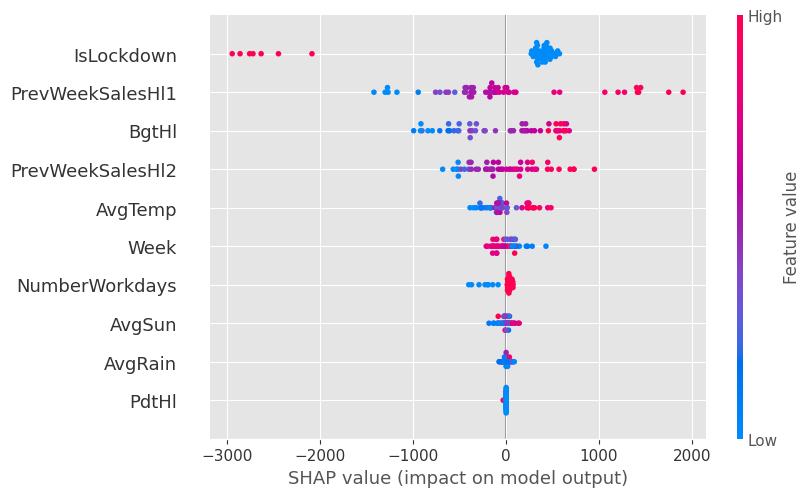

In [804]:
shap.summary_plot(shap_values, x_test[:TOP_ITEMS_CNT])

In [805]:
shap.force_plot(shap_explainer.expected_value, shap_values, x_test)

In [806]:
index = 1

shap.force_plot(shap_explainer.expected_value, shap_values[index,:], x_test.iloc[index,:])

In [807]:
import joblib
import os
import numpy as np

model_path = './models/default.joblib'

file = open(model_path, 'rb')

model = joblib.load(file)


Week = 23
NumberWorkdays = 5
AvgTemp = 15.892857142857142
AvgRain = 3.5000000000000004
AvgSun = 6.735714285714286
IsLockdown = 0
PdtHl = -1.0
BgtHl = 6665
PrevWeekSalesHl1 = 5020
PrevWeekSalesHl2 = 5038

x = np.array([[Week,NumberWorkdays, AvgTemp, AvgRain, AvgSun, IsLockdown, PdtHl, BgtHl, PrevWeekSalesHl1, PrevWeekSalesHl2]])

y_pred = model.predict(x)

print('Forecast sales: %.4f hl'% y_pred[0])

Forecast sales: 6249.3871 hl
